In [1]:
import random
import math
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import copy
from statistics import mean
import matplotlib.pyplot as plt

In [2]:
Operators = ["+", '-', '*', '/', "sin" , "cos"]
Values = list (range(1,11))
variable = ['x']

In [3]:
def function(x):
    # return 2 * (x**2) + 3 * x + 1
    return 2*x

In [4]:
X_train = np.random.randint(1, 1000, size=(100, 1))
y_train = function(X_train[:,0])
len(X_train)
y_train


array([  82, 1152,  730, 1020,  556, 1024,  974, 1848, 1010, 1846,  934,
        346, 1872,  576, 1488,  390, 1848, 1002,  344, 1492, 1602, 1444,
       1490, 1940, 1916, 1984, 1032, 1924, 1748,  600, 1994,  654, 1500,
       1856,  130, 1654,  376, 1532, 1166,  832, 1272,  512,  624,  670,
        364, 1582,  406,   80,  192, 1506,  886,  312,   56, 1000, 1010,
        442, 1318,  862,  488,  832, 1446,  590, 1340,  790,  826, 1772,
       1340,  160,  236,  578,  656, 1838,  466,  944,  910,  586,  654,
        274, 1472,  304,  272, 1460,   22,  790, 1832,  684,   40, 1294,
        530, 1328,  142, 1122, 1220,  820, 1980,  152, 1412, 1038, 1576,
       1932])

In [5]:
class Node() :
    def __init__(self , operator , children) :
        self.operator = operator
        self.children = children
        self.isLeaf= False
        self.value = 0


In [6]:
class Tree () :
    def __init__(self , max_depth = 6) :
        self.max_depth = max_depth
        self.root = None
    def createFromRoot (self , node):
        self.root = node

    def returnRoot (self):
        node = self.root
        return node

    def create (self):
        self.root  = self.grow()
    
    def printTree (self , node = None):
        if (node == None):
            print(self.to_math_string(self.root))
        else:
            print(self.to_math_string(node))
        

    def grow (self , depth = 0 ):

        temp_op = random.choice(Operators)
        temp_rand = random.randint(0 , 10)

        if (depth == self.max_depth or temp_rand > 7):
            if (temp_op == "sin" or temp_op == "cos"):
                temp_node = Node (operator=temp_op, children=["x"])
                temp_node.isLeaf = True
                return temp_node
            else :
                child = random.choice(Values)
                temp_node = Node (operator= temp_op , children=["x",child])
                temp_node.isLeaf = True
                return temp_node
        
        else:
            if (temp_op == "sin" or temp_op == "cos"):
                child = self.grow ( depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[child])
                return temp_node
            else :
                left_node  = self.grow ( depth= depth + 1 )
                right_node = self.grow ( depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[left_node,right_node])
                return temp_node
    
    def to_math_string(self , node):
        if isinstance ( node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    return f"{node.operator}({node.children[0]})"
                else:
                    return f"({node.children[0]} {node.operator} {node.children[1]})"
            else:
                if len(node.children) == 1:
                    return f"{node.operator}({self.to_math_string(node.children[0])})"
                else:
                    return f"({self.to_math_string(node.children[0])} {node.operator} {self.to_math_string(node.children[1])})"
            
    
    def calculate (self , val):
        return self.calculator ( self.root , val)


    def calculator (self , node , val):
        if isinstance (node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    node.value = self.SinCosOp (node , val)
                    # return node.value
                else :
                    node.value = self.OtherOp (node , val , node.children[1])
                    # return node.value
            else:
                if len(node.children) == 1:
                    temp_val = self.calculator(node.children[0] , val)
                    node.value = self.SinCosOp (node , temp_val)
                else :
                    temp_val1 = self.calculator(node.children[0], val)
                    temp_val2 = self.calculator(node.children[1], val)
                    node.value = self.OtherOp (node , temp_val1 , temp_val2)
            return node.value
            


    def SinCosOp (self , node , val):
        if (node.operator == "sin"):
            return np.sin(val)
        if (node.operator == "cos"):
            return np.cos(val)
        
    def OtherOp (self , node , val1 , val2):
        if (node.operator == "+"):
            return val1+val2
        elif (node.operator == "-"):
            return val1-val2
        elif (node.operator == "*"):
            return val1*val2
        elif (node.operator == "/"):
            if(val2==0):
                return 1
            return val1/val2
        elif (node.operator == "^"):
            if(val1==0 and val2<0):
                    return 1
            else: 
                # return left_val ** right_val
                if(val2==0):
                    return 1
                x = 1
                i = 0
                while(not flag and i<val2):
                    x = x*val1
                    i+=1
                    if(x>100000 or x<-100000):
                        flag = True
                        return 1
                return x

    def TreeToList (self):
        root = self.root
        nodes = []
        self.traverse(root , nodes)
        return nodes
    
    def traverse (self , node , nodes):
        nodes.append(node)
        if (node.isLeaf == False):
            for i in range (len(node.children)):
                self.traverse (node.children[i] , nodes)

    def ReplaceNode (self , selfNode , replaceNode):
        
        
        root = self.root
        self.root = self.traverseToFind (root , selfNode , replaceNode)
        # self.printTree(self.root)

    def traverseToFind (self ,node , selfNode , replaceNode):
        if (node == selfNode ):
                node = copy.deepcopy(replaceNode)
                return node
        else :
            if (node.isLeaf == False):
                for i in range (len(node.children)):
                    node.children[i]= self.traverseToFind(node.children[i] , selfNode , replaceNode)

            return node


In [7]:
treeList = []
for i in range (42):
    my_tree = Tree(random.randint(1 , 5))
    my_tree.create()
    treeList.append(my_tree)
    treeList[i].printTree()
    # treeList[i].calculate(1)


mseTree = []
for tree in treeList :
    valueList = []
    for i in range(len(X_train)) :
        temp = tree.calculate(X_train[i][0])
        valueList.append(temp)
    # print(np.array(valueList))
    mse = mean_squared_error(y_train,valueList)
    mseTree.append (mse)
mseTree = np.array(mseTree)
print (mseTree)

((x + 9) - ((x / 6) / (x * 8)))
((x - 9) / (sin(x) + (x + 4)))
(x + 7)
((x / 6) - (cos((x + 5)) / ((x + 6) + (x / 6))))
sin((cos(x) / ((x / 10) / (x / 2))))
sin(sin((cos(x) / cos(x))))
((x * 3) / (sin(x) + cos(cos(x))))
cos(x)
sin(x)
sin(cos(sin((x / 9))))
((((x / 5) - sin(sin(x))) - (((x * 8) / (x - 10)) - (x + 10))) + sin((((x + 6) * (x / 10)) - ((x - 7) + (x - 7)))))
cos((cos(x) * ((x * 6) + (sin(x) / (x - 5)))))
(x / 8)
((((x + 7) + (x * 10)) + (((x - 3) + (x + 7)) + ((x * 5) * (x + 10)))) - cos(x))
sin(sin(x))
((sin(cos(x)) / sin((x * 6))) - sin(((x - 7) * cos(x))))
cos(((sin(x) + (x / 4)) + sin((x + 1))))
cos(cos(((x + 9) + (((x / 6) + cos(x)) * ((x / 6) + (x / 6))))))
cos(x)
cos(((x - 3) * (x - 7)))
cos((cos(x) * (x * 1)))
(((((x + 3) * (x + 2)) - cos(x)) + (cos((x - 6)) - (x - 8))) + ((sin(sin(x)) + (sin(x) - (x * 5))) * (x + 5)))
((cos(x) * (x / 2)) - sin(sin(x)))
(sin(x) / sin(x))
(cos(((cos(x) - sin(x)) - ((x * 4) / cos(x)))) + (x + 10))
sin((x / 9))
sin((((x + 5) / (sin((x 

In [8]:
avg = []
for i in range (100):
    bestTrees = []
    bestTreesIndex = mseTree.argsort()[:5]
    other_idx = np.arange(len(mseTree))[~np.isin(np.arange(len(mseTree)), bestTreesIndex)]
    otherTrees = []
    # print (bestTreesIndex)
    for j in range (len(bestTreesIndex)):
        bestTrees.append(treeList[bestTreesIndex[j]])
    for j in range (len(other_idx)):
        otherTrees.append(treeList[other_idx[j]])
    random_elements = random.sample(otherTrees, 2)
    for element in random_elements :
         bestTrees.append(element)
    # print ("--------------------")
    treeList =[]
    for j in range (len(bestTrees)):
        treeList.append(bestTrees[j])
        for k in range (j+1 , len(bestTrees)):

            temp1 = copy.deepcopy(bestTrees[j])
            temp2 = copy.deepcopy(bestTrees[k])

            nodes1= temp1.TreeToList()
            nodes2 = temp2.TreeToList()

            select1 = random.choice (nodes1)
            select2 = random.choice (nodes2)

            # print ("Before change")
            # temp1.printTree()
            # temp2.printTree()

            # print ("Selected Nodes:")
            # temp1.printTree(select1)
            # temp2.printTree(select2)

            temp1.ReplaceNode (select1 , select2)
            temp2.ReplaceNode (select2 , select1)

            # print ("After change")
            # temp1.printTree()
            # temp2.printTree()

            treeList.append(temp1)
            treeList.append(temp2)
            
            # print ("Child created!")
            # print ("-----------------------------------------------------------")


    mseTree=[]
    # print ("All childs created!")
    for tree in treeList :
        # tree.printTree()
        valueList = []
        for j in range(len(X_train)) :
            temp = tree.calculate(X_train[j][0])
            valueList.append(temp)
        valueList = np.array(valueList)
        mse = mean_squared_error(y_train,valueList)
        mseTree.append (abs(mse))
    sorted_list = sorted(mseTree)
    lowest_five = sorted_list[:5]
    # avg.append(mean (lowest_five))
    avg.append(sum(lowest_five) / len(lowest_five))
    mseTree = np.array(mseTree)
    # print (mseTree)

sorted_list = sorted(mseTree)
lowest_five = sorted_list[:5]
bestTreesIndex = mseTree.argsort()[:5]
for j in range (len(bestTreesIndex)):
        treeList[bestTreesIndex[j]].printTree()

# print ("------------------------------------------")
# print (mseTree)

# np.array(avg)
avg


((((x + 6) - sin(((((x + 6) - (x / 10)) - (((x * 8) / (x + 6)) - (((x * 8) - ((((x + 7) - ((x + 6) / ((((x + 7) - ((x / 10) / (x + 6))) * (x / 10)) / (x + 6)))) * (x * 8)) / (((x * 8) / (x + 7)) - (x + 6)))) / (((x * 8) / ((((x + 7) - ((((x + 7) - ((x + 6) / ((((x + 7) - (((((x * 8) / (x + 7)) - (x + 7)) * (x / 10)) / (x + 6))) * (x / 10)) / (x + 6)))) * (x * 8)) / (((x * 8) / (x + 7)) - (x + 6)))) * (x / 10)) / ((x + 6) - (x / 10)))) - (x + 7))))) / (x + 6)))) - (((x * 8) / (((x + 6) - (x / 10)) - (((x * 8) / (x + 6)) - ((((x + 7) - ((((x * 8) / (x + 7)) * (x / 10)) / (x + 6))) * (x / 10)) / (((x * 8) / (x + 7)) - ((x + 6) - sin(((((((x * 8) - ((((x + 7) - ((x + 6) / ((((x + 7) - (((((x * 8) / (x + 7)) - (x + 7)) * (x / 10)) / (x + 6))) * (x / 10)) / (x + 6)))) * (x * 8)) / (((x * 8) / (x + 7)) - (x + 6)))) / (((x * 8) / ((((x + 7) - ((((x + 7) - ((x + 6) / ((((x + 7) - (((((x * 8) / (x + 7)) - (x + 7)) * (x / 10)) / (x + 6))) * (x / 10)) / (x + 6)))) * (x * 8)) / (((x * 8) / (x + 7))

[40957.264967958894,
 145.2913730430485,
 115.46756340283154,
 93.00685302437267,
 83.07771797524234,
 50.33638026780174,
 28.740432509119938,
 28.03915059874509,
 27.514342536151865,
 27.27815421122188,
 26.49148701632647,
 25.647235042660686,
 24.355540450158788,
 23.69339947913941,
 21.01807671308837,
 17.69720986176488,
 15.007270037881437,
 13.861553860711567,
 13.185443727389725,
 11.687937861060401,
 7.445998072410028,
 6.820168375568931,
 5.940058914041513,
 5.1113324960394895,
 3.1471584368511167,
 2.5405476535036433,
 2.5344234313024234,
 2.1381334581309397,
 1.1323852325179966,
 0.6026732915782999,
 0.572543283767213,
 0.5527958118282392,
 0.5404290103469458,
 0.5402515714470313,
 0.5395685781002834,
 0.5372550153959217,
 0.5362062567143858,
 0.5151153764829776,
 0.4977155881445171,
 0.45930594991835105,
 0.4460999953646002,
 0.4426870234548142,
 0.4425584933616632,
 0.44251358594603163,
 0.44208683322232634,
 0.44135925304739654,
 0.44074993155878966,
 0.4383380165860977,
 

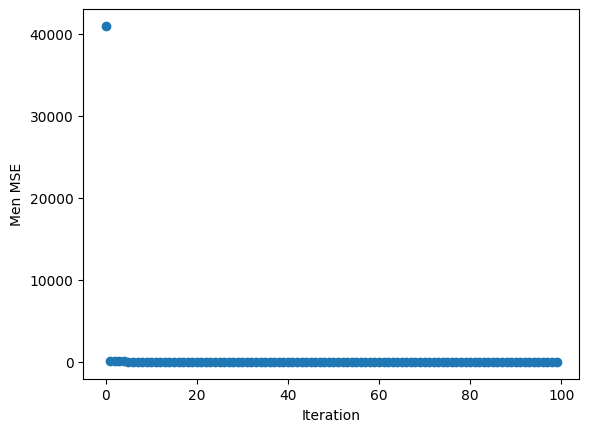

In [9]:
plt.scatter(range(len(avg)), avg)
plt.xlabel('Iteration')
plt.ylabel('Men MSE')

plt.show()